Import the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

Fetch the dataset and change the dataset to a pandas dataframe

In [2]:
data = dt.fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Price'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Check for null values

In [4]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

View the info on dataset

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Feature and target split

In [6]:
feature = df.drop('Price',axis=1)
target = df['Price']

Important Feature selection

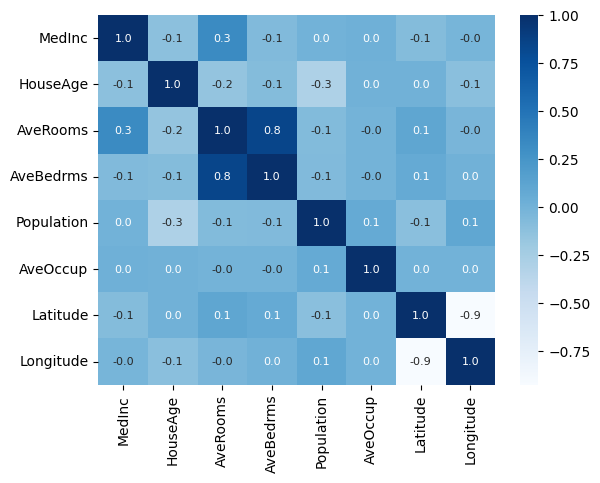

In [7]:
sns.heatmap(feature.corr(),cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

PCA to find important features

In [8]:
scaling = StandardScaler()
df_scaled = scaling.fit_transform(feature)
df_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [9]:
pca = PCA(n_components=8)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225
 0.01020022 0.00569814]


Train Test split

In [10]:
feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size=0.2,random_state=2)

Model Training

In [11]:
model = XGBRegressor()



In [12]:
model.fit(feature_train,target_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

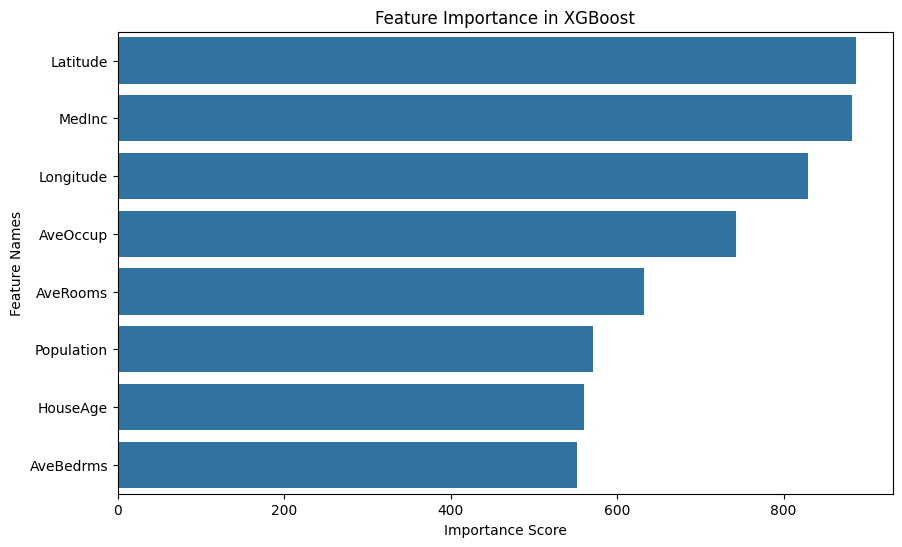

In [13]:
importance = model.feature_importances_
importance = model.get_booster().get_score(importance_type='weight')
importance_list = sorted(importance.items(), key=lambda x: x[1], reverse=True) # Separate the feature names and their importance scores 
feature_names, importance_scores = zip(*importance_list) # Plot feature importance 
plt.figure(figsize=(10, 6)) 
sns.barplot(x=importance_scores, y=feature_names) 
plt.xlabel('Importance Score') 
plt.ylabel('Feature Names') 
plt.title('Feature Importance in XGBoost') 
plt.show()

Model Evaluation

In [14]:
train_prediction = model.predict(feature_train)
r2_train= r2_score(target_train,train_prediction)
mse_train= mean_squared_error(target_train,train_prediction)

In [15]:
print('R2 Score of Train Data:',r2_train)
print('MSE of Train Data:',mse_train)

R2 Score of Train Data: 0.943650140819218
MSE of Train Data: 0.0748112971690747


Visualize the prediction with actual price

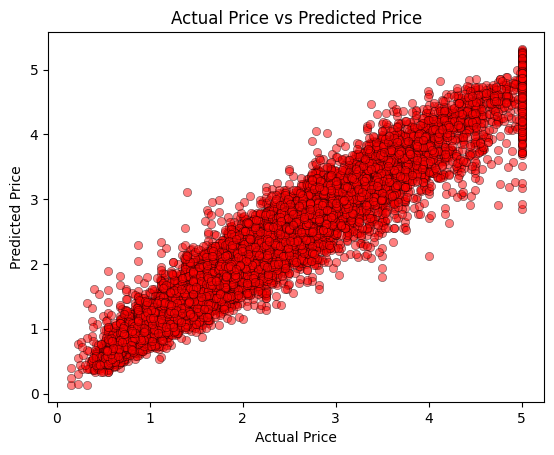

In [16]:
sns.scatterplot(x=target_train,y=train_prediction,color='red',alpha=0.5,edgecolor='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Saving the trained model as pkl file and calculating the r2 score on test data and visualize the predicted values

In [17]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

R2 Score of Test Data: 0.8338000331788725
MSE of Test Data: 0.22387540906811954


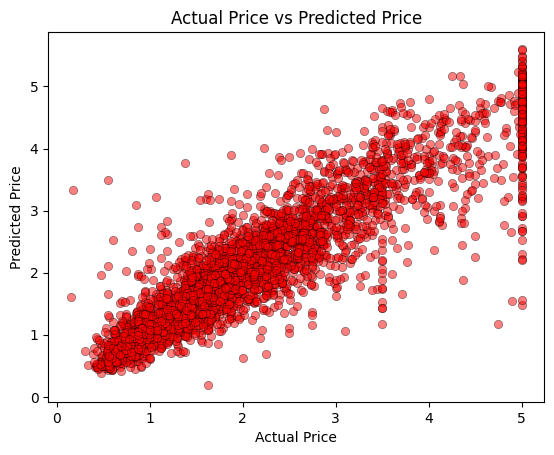

In [18]:
with open('model.pkl','rb') as file:
    model = pickle.load(file)
    test_prediction = model.predict(feature_test)
    r2_test= r2_score(target_test,test_prediction)
    mse_test= mean_squared_error(target_test,test_prediction)
    print('R2 Score of Test Data:',r2_test)
    print('MSE of Test Data:',mse_test)
    
    sns.scatterplot(x=target_test,y=test_prediction,color='red',alpha=0.5,edgecolor='black')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')
    plt.show()